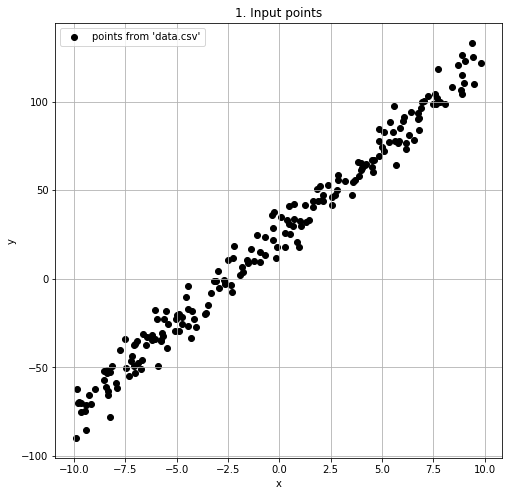

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

m = len(x_data)

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('1. Input points')
plt.legend(['points from \'data.csv\''])
plt.grid()
plt.show()


In [2]:
from sympy import symbols, diff

theta_0 = symbols('theta_0')
theta_1 = symbols('theta_1')
sum = 0
for i in range(m):
    sum += (theta_0 + theta_1 * x_data[i] - y_data[i])**2
j_func = sum / (2*m)

partial0 = diff(j_func, theta_0) #partial derivative on theta0
partial1 = diff(j_func, theta_1) #partial derivative on theta1

In [10]:
thet0 = -30 #initial theta0
thet1 = -30 #initial theta1
theta0_list = list()
theta1_list = list()

j_value = list()
j_iter = list()
t = 1 #the number of iteration
learning_rate = 0.01
tempj = 0 #temporary value for check convergence

while True:
    if t>1 and abs(tempj - j_func.evalf(subs={theta_0: thet0, theta_1: thet1})) <= 0.001:
        #print("finish")
        break #if the enenrgy is conversing, break the loop.
    tempj = j_func.evalf(subs={theta_0: thet0, theta_1: thet1})
    
    j_value.append(tempj)
    j_iter.append(t)
    t += 1
    print(t , tempj)
    
    theta0_list.append(thet0)
    theta1_list.append(thet1)
    temp0 = thet0 - learning_rate * partial0.evalf(subs={theta_0: thet0, theta_1: thet1})
    temp1 = thet1 - learning_rate * partial1.evalf(subs={theta_0: thet0, theta_1: thet1})
    thet0 = temp0
    thet1 = temp1
    print(thet0, thet1)

2 26495.7657641543
3 12838.6612214367
4 6628.05362373175
5 3795.40151378608
6 2495.25732401299
7 1890.54219958692
8 1601.56129862544
9 1456.08377179758
10 1375.98205139674
11 1325.81279708487
12 1289.49383047496
13 1259.72507161312
14 1233.19000114337
15 1208.37909928369
16 1184.60258191865
17 1161.54258756854
18 1139.05005281335
19 1117.05257548935
20 1095.51262063991
21 1074.40856137041
22 1053.72607737729
23 1033.45425162930
24 1013.58379810965
25 994.106256216156
26 975.013623660106
27 956.298188296140
28 937.952450217593
29 919.969084827280
30 902.340924525675
31 885.060948874571
32 868.122278635331
33 851.518171594242
34 835.242019227516
35 819.287343775616
36 803.647795531165
37 788.317150251069
38 773.289306651819
39 758.558283968802
40 744.118219570405
41 729.963366622243
42 716.088091798875
43 702.486873041332
44 689.154297359219
45 676.085058676352
46 663.273955719005
47 650.715889945894
48 638.405863519057
49 626.338977314820
50 614.510428974048
51 602.915510990909
52 591.5

398 28.0346314240229
399 28.0234299187979
400 28.0124496589528
401 28.0016862745822
402 27.9911354820925
403 27.9807930824970
404 27.9706549597448
405 27.9607170790828
406 27.9509754854501
407 27.9414263019034
408 27.9320657280747
409 27.9228900386585
410 27.9138955819295
411 27.9050787782886
412 27.8964361188394
413 27.8879641639905
414 27.8796595420876
415 27.8715189480713
416 27.8635391421616
417 27.8557169485687
418 27.8480492542292
419 27.8405330075668
420 27.8331652172784
421 27.8259429511431
422 27.8188633348555
423 27.8119235508820
424 27.8051208373388
425 27.7984524868934
426 27.7919158456869
427 27.7855083122778
428 27.7792273366068
429 27.7730704189816
430 27.7670351090825
431 27.7611190049869
432 27.7553197522138
433 27.7496350427861
434 27.7440626143129
435 27.7386002490882
436 27.7332457732093
437 27.7279970557107
438 27.7228520077167
439 27.7178085816097
440 27.7128647702155
441 27.7080186060042
442 27.7032681603076
443 27.6986115425512
444 27.6940468995022
445 27.689572

24.5939803900488 9.92980945084396


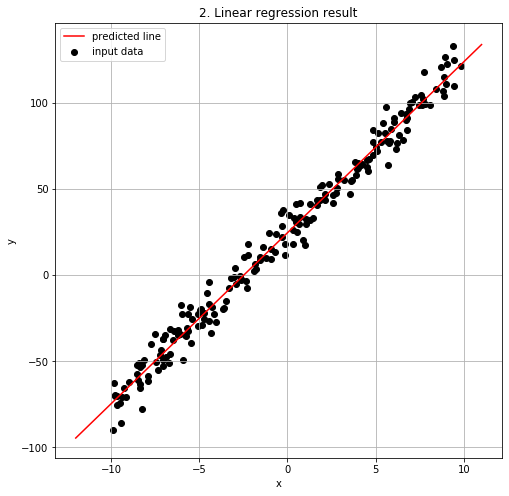

In [11]:
x_pred_line = [x1 for x1 in range(-12, 12)]
y_pred_line = [thet1 * y1 + thet0 for y1 in range(-12, 12)]

print(thet0, thet1)

plt.figure(figsize=(8, 8))
plt.plot(x_pred_line, y_pred_line, c = 'red')
plt.scatter(x_data, y_data, c = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2. Linear regression result')
plt.legend(['predicted line', 'input data'])
plt.grid()
plt.show()

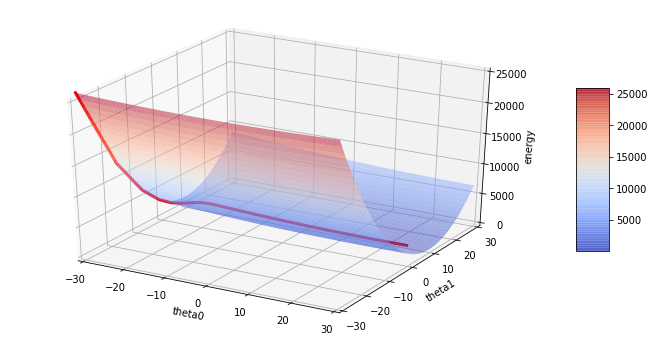

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

theta0_Domain = np.arange(-30,30,0.1)
theta1_Domain = np.arange(-30,30,0.1)
xs, ys = np.meshgrid(theta0_Domain, theta1_Domain)
zs = np.zeros((600,600))

for i in range(m):
    zs += (xs + ys*x_data[i] - y_data[i])**2

zs = zs / (2 * m)
    

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
#surf = ax.plot_wireframe(xs, ys, zs, rstride=50, cstride=50)
surf = ax.plot_surface(xs, ys, zs, rstride=10, cstride=10,alpha=0.5, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)


surf = ax.plot(theta0_list, theta1_list, j_value, color='red', linewidth = 3.0)

ax.set_xlabel('theta0')
ax.set_xlim(-30, 30)
ax.set_ylabel('theta1')
ax.set_ylim(-30, 30)
ax.set_zlabel('energy')
ax.set_zlim(0, 25000)

 
plt.show()

KeyboardInterrupt: 

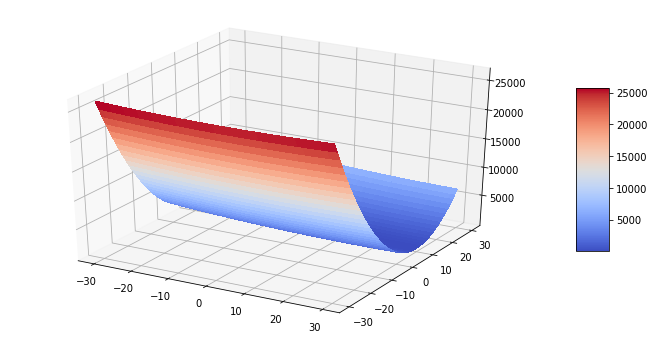

In [35]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xs, ys, zs, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)



#xs, ys, zs = axes3d.get_test_data(0.05)
ax.plot_surface(xs, ys, zs, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(xs, ys, zs, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(xs, ys, zs, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(xs, ys, zs, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('\theta_0')
ax.set_xlim(-30, 30)
ax.set_ylabel('Y')
ax.set_ylim(-30, 30)
ax.set_zlabel('Z')
ax.set_zlim(0, 25000)


plt.show()

In [34]:
print(latex(\theta_0))

SyntaxError: unexpected character after line continuation character (<ipython-input-34-f6d4714493fa>, line 1)